In [1]:
import sys
sys.path.append('../../')
import numpy as np
import line_profiler   # Need deleted

from rover_simulator.world import World
from rover_simulator.rover import BasicRover
from rover_simulator.history import History
from rover_simulator.navigation.controller import ConstantSpeedController
from rover_simulator.navigation.path_planner.sampling_base import ChanceConstrainedRRTstar, ChanceConstrainedRRT

In [2]:
world = World(end_step=200)
# world.read_objects("../../rover_simulator/examples/environment_simple.txt")
world.read_objects("C:/Users/k1100/Documents/Project/0_Research/localization_scheduling/envs/scene1.txt")

rover_r = 0.5
start_pose = np.array([1.0, 1.0, 0.0])
goal_pos = np.array([13.0, 15.0])

path_planner = ChanceConstrainedRRTstar(
    start_pose[0:2],
    goal_pos,
    start_cov=np.diag([1e-10, 1e-10, 1e-10]),
    motion_noise_stds = {"nn": 0.05, "no": 0.00005, "on": 0.005, "oo": 0.01},
    enlarge_range=rover_r,
    explore_region=[[2, 16], [2, 16]],
    known_obstacles=world.obstacles,
    path_resolution=2.0,
    p_safe=1.0-1e-5,
    mu=10
)

rover = BasicRover(
    start_pose, rover_r,
    sensor=None,
    mapper=None,
    path_planner=path_planner,
    localizer=None,
    controller=ConstantSpeedController(w=np.pi/32),
    history=History()
)

world.append_rover(rover)

In [3]:
# def process():
#     rover.waypoints = rover.path_planner.calculate_path(max_iter=100)

# prof = line_profiler.LineProfiler()
# prof.add_function(rover.path_planner.expand_tree)
# prof.add_function(rover.path_planner.connect_to_target)
# prof.add_function(rover.path_planner.is_safe)
# prof.add_function(rover.path_planner.steer)
# prof.runcall(process)
# prof.print_stats()

In [4]:
%%time
rover.waypoints = rover.path_planner.calculate_path(max_iter=300)

CPU times: total: 1.14 s
Wall time: 1.15 s


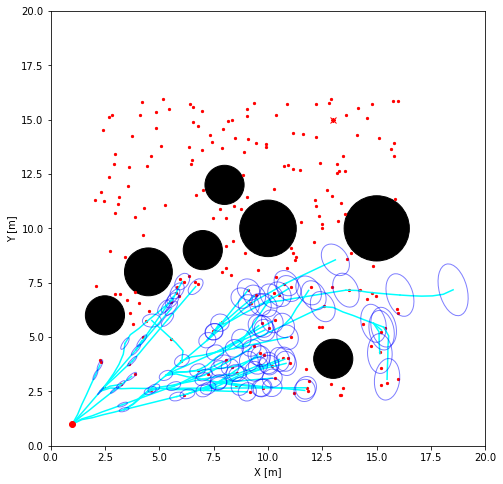

In [5]:
path_planner.draw(
    xlim=[0.0, 20.0],
    ylim=[0.0, 20.0],
    obstacles=world.obstacles, enlarge_range=rover.r
)

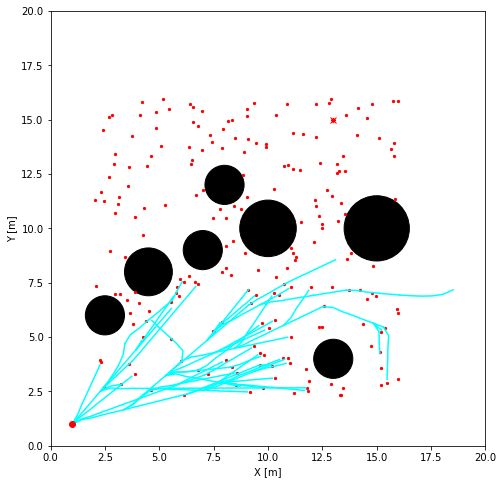

In [6]:
path_planner.draw(
    xlim=[0.0, 20.0],
    ylim=[0.0, 20.0],
    obstacles=world.obstacles, enlarge_range=rover.r,
    draw_ellipse=False
)